# **Predicting User Engagement Levels in Netflix: A Clustering-Based Approach**

 This project aims to analyze dataset of Netflix user data, employ clustering techniques to identify user segments, and develop machine learning models for predicting user engagement levels, providing valuable insights for enhancing the streaming experience.






**1.Importing Libraries, Reading and Understanding the data**

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the data

df=pd.read_csv('/content/drive/MyDrive/netflix user_data.csv')
df.head()

,User ID,Subscription Plan,Monthly Revenue ($),Join Date,Last Payment,Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating
0,1,Premium,15.99,5/15/2020,7/10/2023,USA,28,Male,Smart TV,12,200.0,Drama,10.0,60%,Weekly
1,2,Standard,11.99,1/8/2021,7/12/2023,Canada,35,Female,Laptop,6,150.0,Comedy,5.0,40%,Monthly
2,3,Basic,8.99,3/20/2022,7/11/2023,UK,42,Male,Mobile,3,100.0,Action,3.0,20%,Never
3,4,Premium,15.99,11/2/2020,7/12/2023,Australia,23,Female,Laptop,12,180.0,Comedy,8.0,70%,Monthly
4,5,Basic,8.99,7/15/2021,7/10/2023,USA,31,Male,Smart TV,6,90.0,Action,6.0,50%,Weekly


In [ ]:
df.tail()

,User ID,Subscription Plan,Monthly Revenue ($),Join Date,Last Payment,Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating
541,542,Premium,15.99,4/2/2021,7/11/2023,Australia,35,Male,Smart TV,12,180.0,Fantasy,8.0,60%,Weekly
542,543,Basic,8.99,8/9/2022,7/10/2023,UK,29,Female,Laptop,3,90.0,Comedy,4.0,40%,Never
543,544,Premium,15.99,10/16/2020,7/12/2023,Canada,41,Male,Mobile,12,200.0,Mystery,10.0,70%,Monthly
544,545,Basic,8.99,12/31/2021,7/12/2023,UK,55,Female,Mobile,12,250.0,Drama,NaN,54%,Monthly
545,546,Basic,100.00,1/9/2021,7/11/2023,USA,25,Female,Mobile,1,10.0,Action,50.0,30%,Monthly


In [ ]:
df.shape

(546, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          546 non-null    int64  
 1   Subscription Plan                546 non-null    object 
 2   Monthly Revenue ($)              546 non-null    float64
 3   Join Date                        546 non-null    object 
 4   Last Payment                     546 non-null    object 
 5   Country                          546 non-null    object 
 6   Age                              546 non-null    int64  
 7   Gender                           546 non-null    object 
 8   Device                           546 non-null    object 
 9   Plan Duration (Months)           546 non-null    int64  
 10  Total Movies/Shows Watched       545 non-null    float64
 11  Genre Preference                 545 non-null    object 
 12  No. of Recommendations

**2.Exploratory Data Analysis(EDA)**

EDA involves data exploration, visualization, to detect any outliers or missing values

In [ ]:
df.corr()

,User ID,Monthly Revenue ($),Age,Plan Duration (Months),Total Movies/Shows Watched,No. of Recommendations Viewed
User ID,1.000000,0.045907,0.018633,-0.013385,-0.003869,0.016702
Monthly Revenue ($),0.045907,1.000000,-0.014402,0.461880,0.444772,0.539447
Age,0.018633,-0.014402,1.000000,0.097960,0.082154,0.042367
Plan Duration (Months),-0.013385,0.461880,0.097960,1.000000,0.934553,0.616268
Total Movies/Shows Watched,-0.003869,0.444772,0.082154,0.934553,1.000000,0.569725
No. of Recommendations Viewed,0.016702,0.539447,0.042367,0.616268,0.569725,1.000000


Heatmap

<Axes: >

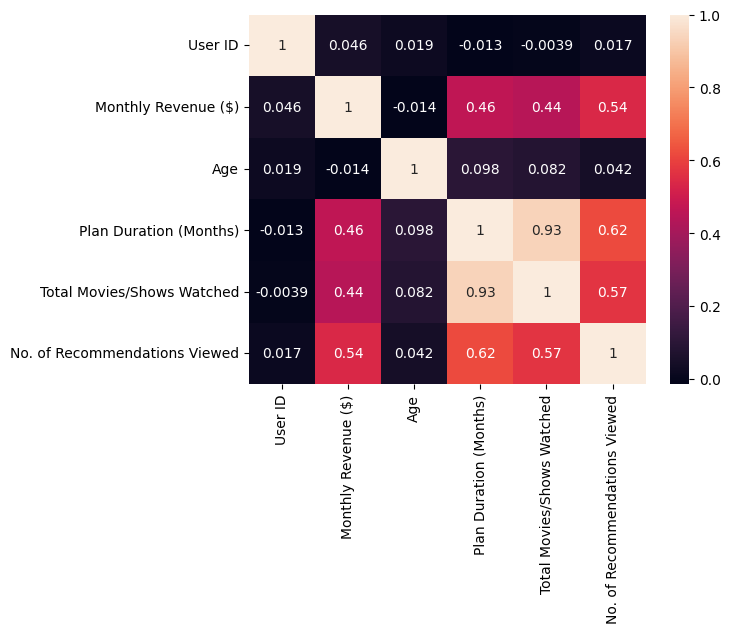

In [ ]:
sns.heatmap(df.corr(),annot=True)

Countplot

<Axes: xlabel='Gender', ylabel='count'>

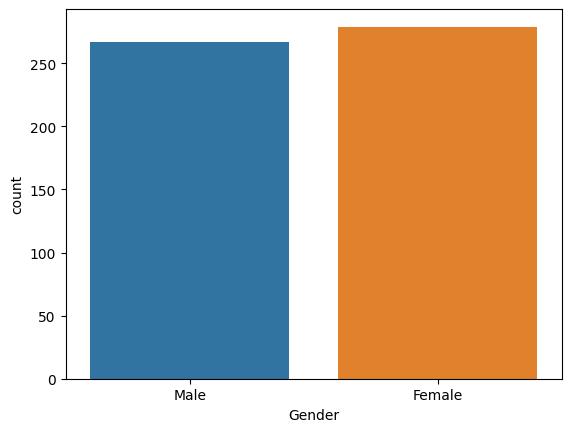

In [ ]:
sns.countplot(data = df, x = df['Gender'])

<Axes: xlabel='Device', ylabel='count'>

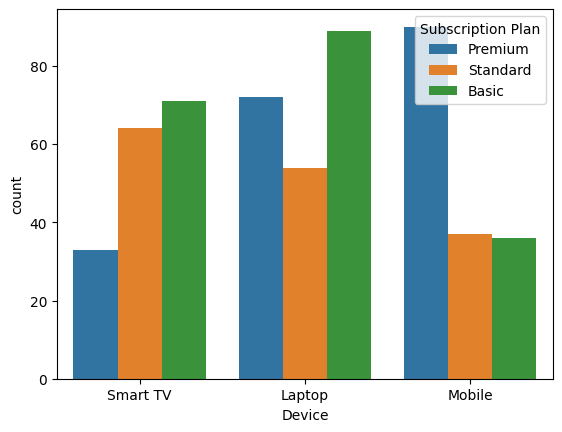

In [ ]:
sns.countplot(data = df, x = 'Device',hue='Subscription Plan')

<Axes: xlabel='Age', ylabel='count'>

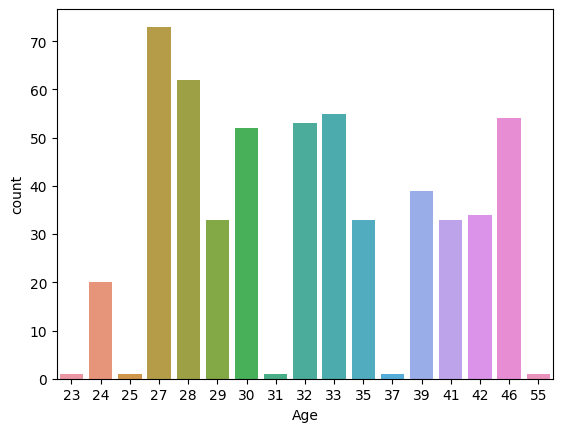

In [ ]:
sns.countplot(data = df, x = 'Age')

<Axes: xlabel='Gender', ylabel='Total Movies/Shows Watched'>

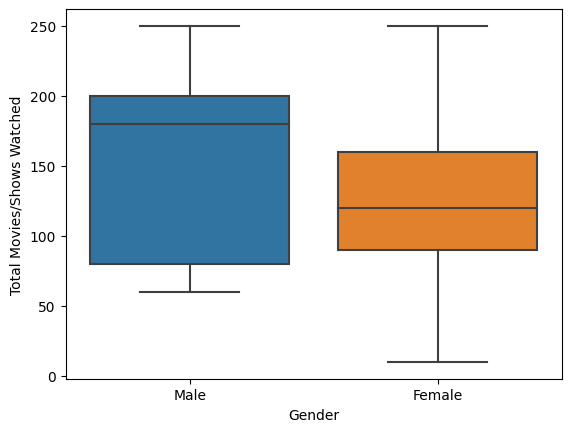

In [ ]:
sns.boxplot(data=df, x='Gender', y = 'Total Movies/Shows Watched')

PIE CHART

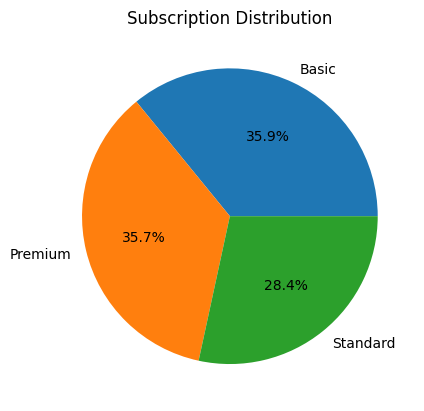

In [ ]:
subscription_counts = df['Subscription Plan'].value_counts()

# Get the labels and counts for the pie chart
labels = subscription_counts.index
counts = subscription_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Subscription Distribution')
plt.show()

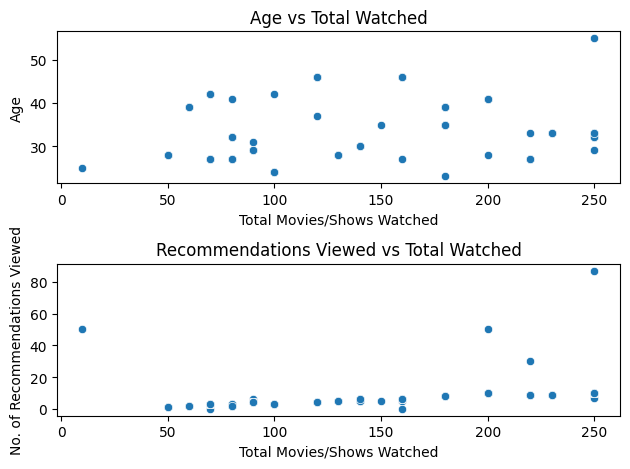

In [ ]:
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='Total Movies/Shows Watched',y='Age' )
plt.title('Age vs Total Watched')

plt.subplot(2,1,2)
sns.scatterplot(data=df, x='Total Movies/Shows Watched',y='No. of Recommendations Viewed')
plt.title('Recommendations Viewed vs Total Watched')

plt.tight_layout()

<Axes: xlabel='Gender', ylabel='Monthly Revenue ($)'>

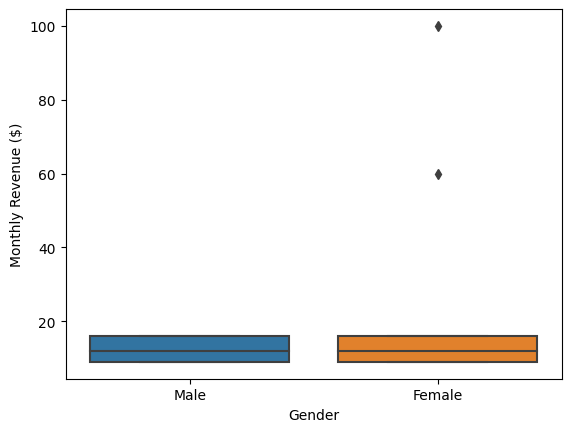

In [ ]:
sns.boxplot(data=df, x='Gender', y = 'Monthly Revenue ($)')

In [ ]:
#outlier removing

def detect_outliers_iqr_feature(data, feature, threshold=1.5):

    feature_data = data[feature]
    quartile_1 = np.percentile(feature_data, 25)
    quartile_3 = np.percentile(feature_data, 75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - threshold * iqr
    upper_bound = quartile_3 + threshold * iqr

    outliers = np.where((feature_data < lower_bound) | (feature_data > upper_bound))[0]
    return outliers

def remove_outliers_iqr_feature(data, feature, threshold=1.5):
    outliers = detect_outliers_iqr_feature(data, feature, threshold)
    cleaned_data = data.drop(outliers)

    return cleaned_data


In [ ]:
feature_name = ['Total Movies/Shows Watched','Age','Plan Duration (Months)','No. of Recommendations Viewed','Monthly Revenue ($)']
for i in feature_name:
   outliers = detect_outliers_iqr_feature(df, i)
   print("Indices of outliers in", i, ":", outliers)

   cleaned_data = remove_outliers_iqr_feature(df, i)
   print("Data with outliers removed from:", i)
df=cleaned_data


Indices of outliers in Total Movies/Shows Watched : []
Data with outliers removed from: Total Movies/Shows Watched
Indices of outliers in Age : []
Data with outliers removed from: Age
Indices of outliers in Plan Duration (Months) : []
Data with outliers removed from: Plan Duration (Months)
Indices of outliers in No. of Recommendations Viewed : []
Data with outliers removed from: No. of Recommendations Viewed
Indices of outliers in Monthly Revenue ($) : [227 545]
Data with outliers removed from: Monthly Revenue ($)


<Axes: xlabel='Gender', ylabel='Monthly Revenue ($)'>

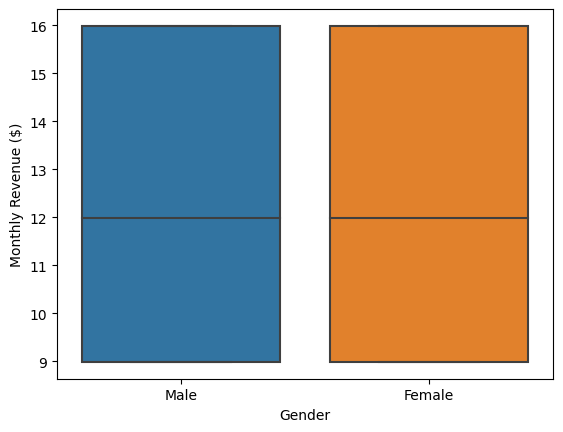

In [ ]:
sns.boxplot(data=df, x='Gender', y = 'Monthly Revenue ($)')

**3.Data Preprocessing**

handling missing values, encoding categorical variables, normalizing numerical features

In [ ]:
# Convert to datetime
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment'] = pd.to_datetime(df['Last Payment'])

# Create duration feature
df['Duration'] = (df['Last Payment'] - df['Join Date']).dt.days

In [ ]:
df.drop(['Join Date','Last Payment'],axis=1,inplace=True)
df.head()

,User ID,Subscription Plan,Monthly Revenue ($),Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating,Duration
0,1,Premium,15.99,USA,28,Male,Smart TV,12,200.0,Drama,10.0,60%,Weekly,1151
1,2,Standard,11.99,Canada,35,Female,Laptop,6,150.0,Comedy,5.0,40%,Monthly,915
2,3,Basic,8.99,UK,42,Male,Mobile,3,100.0,Action,3.0,20%,Never,478
3,4,Premium,15.99,Australia,23,Female,Laptop,12,180.0,Comedy,8.0,70%,Monthly,982
4,5,Basic,8.99,USA,31,Male,Smart TV,6,90.0,Action,6.0,50%,Weekly,725


In [ ]:
#checking for missing values
df.isna().sum()

User ID                            0
Subscription Plan                  0
Monthly Revenue ($)                0
Country                            0
Age                                0
Gender                             0
Device                             0
Plan Duration (Months)             0
Total Movies/Shows Watched         1
Genre Preference                   1
No. of Recommendations Viewed      2
% of Recommendations Acted Upon    1
Frequency of Rating                4
Duration                           0
dtype: int64

In [ ]:
#filling missing values

col=['Total Movies/Shows Watched','Genre Preference','No. of Recommendations Viewed','% of Recommendations Acted Upon','Frequency of Rating']
for i in col:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.isna().sum()

User ID                            0
Subscription Plan                  0
Monthly Revenue ($)                0
Country                            0
Age                                0
Gender                             0
Device                             0
Plan Duration (Months)             0
Total Movies/Shows Watched         0
Genre Preference                   0
No. of Recommendations Viewed      0
% of Recommendations Acted Upon    0
Frequency of Rating                0
Duration                           0
dtype: int64

In [ ]:
#checking datatype
df.dtypes

User ID                              int64
Subscription Plan                   object
Monthly Revenue ($)                float64
Country                             object
Age                                  int64
Gender                              object
Device                              object
Plan Duration (Months)               int64
Total Movies/Shows Watched         float64
Genre Preference                    object
No. of Recommendations Viewed      float64
% of Recommendations Acted Upon     object
Frequency of Rating                 object
Duration                             int64
dtype: object

In [ ]:
# Apply label encoding to the categorical columns
sp = LabelEncoder()
ce = LabelEncoder()
de = LabelEncoder()
ge = LabelEncoder()
gn = LabelEncoder()
fr = LabelEncoder()

df['Subscription Plan'] = sp.fit_transform(df['Subscription Plan'])
df['Country'] = ce.fit_transform(df['Country'])
df['Device'] = de.fit_transform(df['Device'])
df['Gender'] = ge.fit_transform(df['Gender'])
df['Genre Preference'] = gn.fit_transform(df['Genre Preference'])
df['Frequency of Rating'] = fr.fit_transform(df['Frequency of Rating'])

In [ ]:
df.head(3)

,User ID,Subscription Plan,Monthly Revenue ($),Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating,Duration
0,1,1,15.99,3,28,1,2,12,200.0,4,10.0,60%,2,1151
1,2,2,11.99,1,35,0,0,6,150.0,1,5.0,40%,0,915
2,3,0,8.99,2,42,1,1,3,100.0,0,3.0,20%,1,478


since the column '% of Recommendations Acted Upon' is in object type due to '%', hence remove the percentage symbol (%) using string manipulation functions.

In [ ]:
new_column = df['% of Recommendations Acted Upon']

# Remove the percentage symbol
new_column = new_column.str.replace('%','')

In [ ]:
# Convert the column to numeric
new_column = pd.to_numeric(new_column)

# Update the original dataset with the modified column
df['% of Recommendations Acted Upon'] = new_column

In [ ]:
df.dtypes

User ID                              int64
Subscription Plan                    int64
Monthly Revenue ($)                float64
Country                              int64
Age                                  int64
Gender                               int64
Device                               int64
Plan Duration (Months)               int64
Total Movies/Shows Watched         float64
Genre Preference                     int64
No. of Recommendations Viewed      float64
% of Recommendations Acted Upon      int64
Frequency of Rating                  int64
Duration                             int64
dtype: object

In [ ]:
# #normalizing the data

# data=normalize(df)
# data

In [ ]:
# df=pd.DataFrame(data,columns=df.columns)
# df.head()

**4.Model Building**

Apply clustering algorithm (hierarchical clustering) to group users based on their features and behaviors, identifying distinct segments within the data.

*Dendrogram*

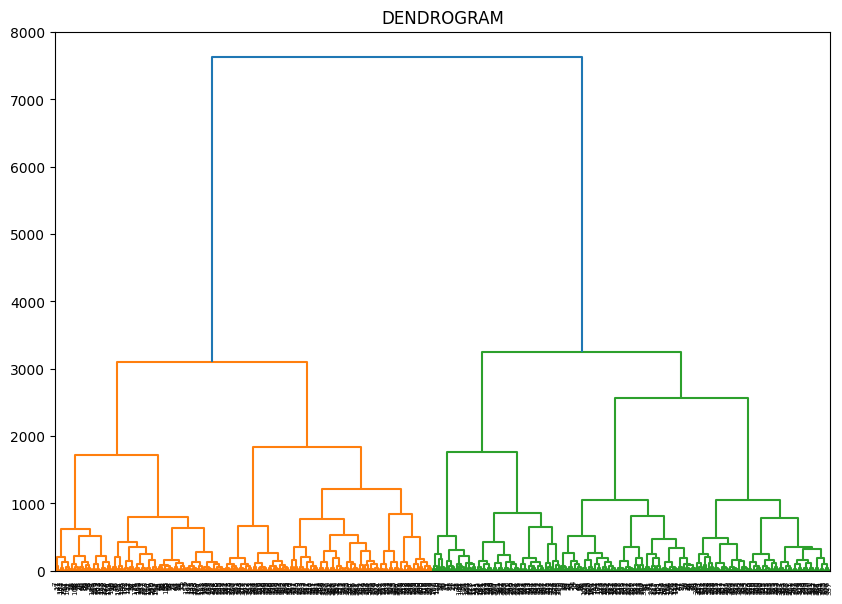

In [ ]:
#dendrogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title('DENDROGRAM')
den=shc.dendrogram(shc.linkage(df,method='ward'))


In [ ]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y=cluster.fit_predict(df)

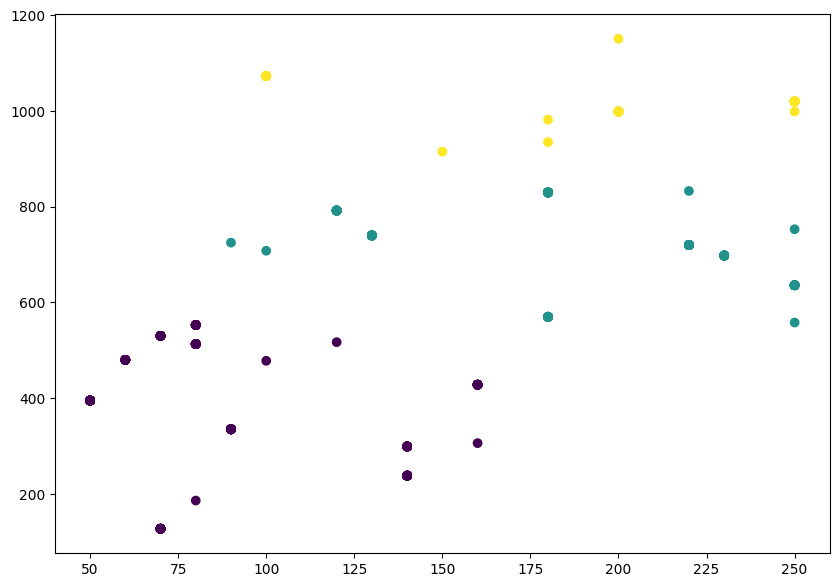

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df['Total Movies/Shows Watched'],df['Duration'],c=cluster.labels_)

In [ ]:
df['cluster']=y
df.head()

,User ID,Subscription Plan,Monthly Revenue ($),Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating,Duration,cluster
0,1,1,15.99,3,28,1,2,12,200.0,4,10.0,60,2,1151,2
1,2,2,11.99,1,35,0,0,6,150.0,1,5.0,40,0,915,2
2,3,0,8.99,2,42,1,1,3,100.0,0,3.0,20,1,478,0
3,4,1,15.99,0,23,0,0,12,180.0,1,8.0,70,0,982,2
4,5,0,8.99,3,31,1,2,6,90.0,0,6.0,50,2,725,1


**Cluster Analysis**

To determine the actual order of engagement levels across the clusters.

Calculate cluster statistics: Calculate descriptive statistics for each cluster based on relevant features that depending engagement level. This can include measures such as average monthly revenue, total number of movies/shows watched, No. of Recommendations Viewed and duration. Compare these statistics across clusters to identify differences in engagement levels.

In [ ]:
# Iterate over each cluster
for cluster_id in df['cluster'].unique():
    # Filter data points belonging to the current cluster
    cluster_data = df[df['cluster'] == cluster_id]

    # Calculate statistics for relevant features
    revenue_mean = cluster_data['Monthly Revenue ($)'].mean()
    total_watched_min = cluster_data['Total Movies/Shows Watched'].min()
    recom_std = cluster_data['No. of Recommendations Viewed'].std()
    duration_mode= cluster_data['Duration'].mode()[0]

# By using various statistics for different features, can capture different aspects of the data
#and gain a comprehensive understanding of the clusters.

    # Print or store the statistics for the current cluster
    print(f"Cluster {cluster_id} statistics:")
    print(f"Mean monthly revenue: {revenue_mean}")
    print(f"Minimum total number of movies watched: {total_watched_min}")
    print(f"Standard deviation of reco. viewed: {recom_std}")
    print(f"Mode of duration:{duration_mode}")
    print()

Cluster 2 statistics:
Mean monthly revenue: 15.945555555555558
Minimum total number of movies watched: 100.0
Standard deviation of reco. viewed: 9.790285383487927
Mode of duration:1020

Cluster 0 statistics:
Mean monthly revenue: 9.805094339622643
Minimum total number of movies watched: 50.0
Standard deviation of reco. viewed: 1.6719783853218377
Mode of duration:395

Cluster 1 statistics:
Mean monthly revenue: 14.20164021164021
Minimum total number of movies watched: 90.0
Standard deviation of reco. viewed: 2.7174847983759687
Mode of duration:792



since cluster 2 has a higher statistical value for each features that depends on engagement level and cluster 1 represents lower than that, we can conclude that cluster 2 represents high engagement level,
cluster 1 represents medium engagemnt level and
cluster 0 represents low engagement level.

In [ ]:
df['Engagement level']=df['cluster']
df.drop(['cluster'],axis=1,inplace=True)

**5.Predictive Modelling**

Develop machine learning models using the clustered data to predict user engagement levels (high, medium or low).

*data preprocessing*

In [ ]:
#splitting input and output data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#feature selection

In [ ]:
df.head()

,User ID,Subscription Plan,Monthly Revenue ($),Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating,Duration,Engagement level
0,1,1,15.99,3,28,1,2,12,200.0,4,10.0,60,2,1151,2
1,2,2,11.99,1,35,0,0,6,150.0,1,5.0,40,0,915,2
2,3,0,8.99,2,42,1,1,3,100.0,0,3.0,20,1,478,0
3,4,1,15.99,0,23,0,0,12,180.0,1,8.0,70,0,982,2
4,5,0,8.99,3,31,1,2,6,90.0,0,6.0,50,2,725,1


In [ ]:
df.corr()

,User ID,Subscription Plan,Monthly Revenue ($),Country,Age,Gender,Device,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating,Duration,Engagement level
User ID,1.000000,-0.015733,-0.004714,-0.005837,0.024024,-0.002337,0.006612,-0.008631,-0.000705,0.215783,-0.011152,0.016265,-0.004146,-0.014908,-0.007712
Subscription Plan,-0.015733,1.000000,0.465156,0.511786,0.231523,-0.220774,0.064684,0.424762,0.474486,-0.342748,0.265613,0.513444,-0.309879,0.244193,0.338508
Monthly Revenue ($),-0.004714,0.465156,1.000000,-0.151136,-0.010160,0.083256,-0.062937,0.903505,0.883112,-0.335232,0.570470,0.833492,0.082304,0.750150,0.832801
Country,-0.005837,0.511786,-0.151136,1.000000,0.122535,-0.667776,-0.167973,-0.063274,-0.006247,-0.022779,-0.015117,0.127663,-0.503045,-0.209021,-0.138650
Age,0.024024,0.231523,-0.010160,0.122535,1.000000,0.267776,0.127483,0.095887,0.080165,-0.145282,0.065586,0.083561,-0.339239,0.011105,0.091057
Gender,-0.002337,-0.220774,0.083256,-0.667776,0.267776,1.000000,0.068655,0.214425,0.170292,0.001031,0.162997,0.053619,0.255077,0.099469,0.143369
Device,0.006612,0.064684,-0.062937,-0.167973,0.127483,0.068655,1.000000,-0.144830,-0.198496,0.137471,-0.184926,-0.249677,0.200804,-0.013840,-0.108483
Plan Duration (Months),-0.008631,0.424762,0.903505,-0.063274,0.095887,0.214425,-0.144830,1.000000,0.934740,-0.275489,0.679552,0.883889,-0.010679,0.653698,0.757087
Total Movies/Shows Watched,-0.000705,0.474486,0.883112,-0.006247,0.080165,0.170292,-0.198496,0.934740,1.000000,-0.303442,0.636873,0.940189,-0.030756,0.577280,0.696270
Genre Preference,0.215783,-0.342748,-0.335232,-0.022779,-0.145282,0.001031,0.137471,-0.275489,-0.303442,1.000000,-0.214419,-0.266742,0.009643,-0.204446,-0.259138


HEATMAP

<Axes: >

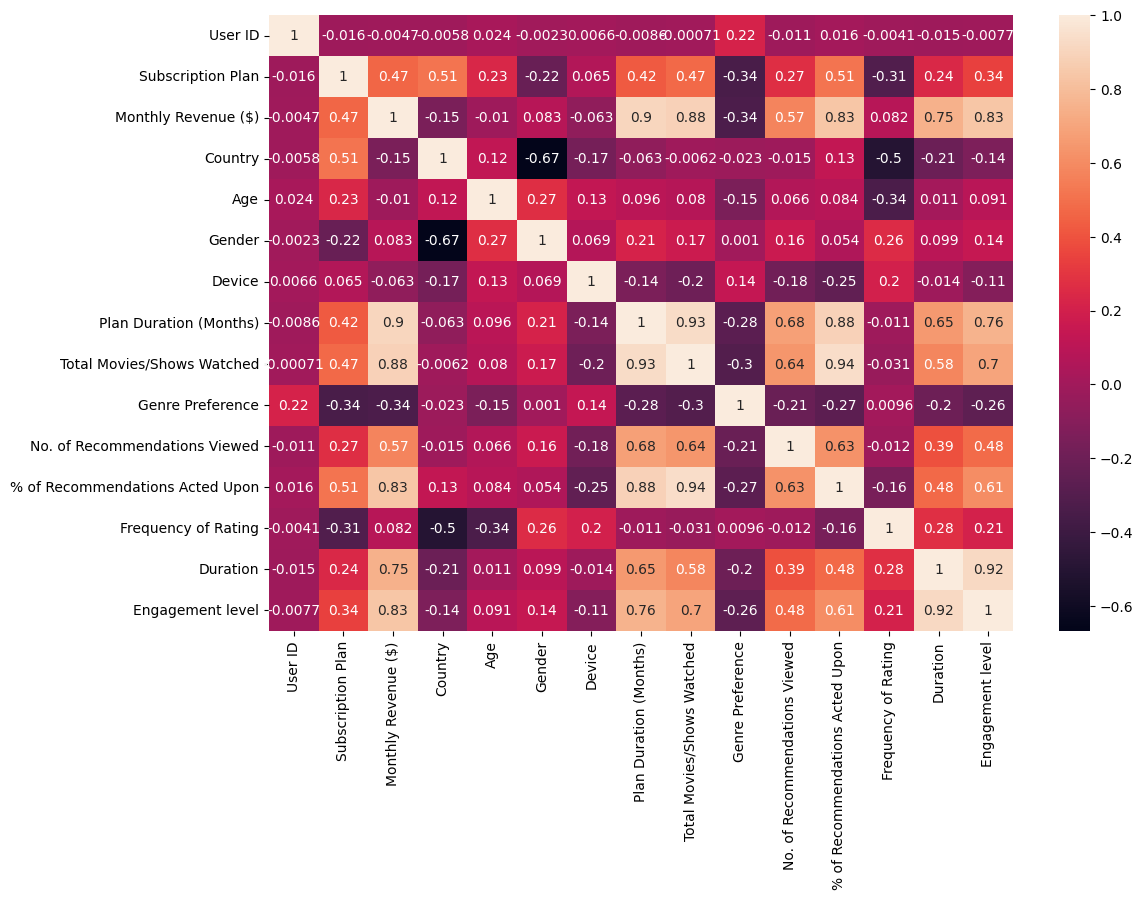

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)


here features like user id, country, gender and device have less correlation compared to others

In [ ]:
#feature selection:

from sklearn.feature_selection import f_regression, SelectKBest

# Applying SelectKBest class to extract top 10 best features
fs = SelectKBest(score_func=f_regression,k=10)
# Applying feature selection
fit = fs.fit(X,y)

Here, the features of the data will be ranked according to the ranking metrics of the f-regressor module. So let us now use the fitted instance and observe how each of the features of the data is ranked according to the F-statistic.

In [ ]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(10,columns="F_Score"))

                     Input_Features      F_Score
13                         Duration  2850.842462
2               Monthly Revenue ($)  1226.682006
7            Plan Duration (Months)   727.857485
8        Total Movies/Shows Watched   510.002690
11  % of Recommendations Acted Upon   316.873860
10    No. of Recommendations Viewed   165.333219
1                 Subscription Plan    70.144336
9                  Genre Preference    39.016654
12              Frequency of Rating    24.324263
5                            Gender    11.374369


we had 15 columns as features. now we made 10 best features using f_regression feature selection method

In [ ]:
X.columns

Index(['User ID', 'Subscription Plan', 'Monthly Revenue ($)', 'Country', 'Age',
       'Gender', 'Device', 'Plan Duration (Months)',
       'Total Movies/Shows Watched', 'Genre Preference',
       'No. of Recommendations Viewed', '% of Recommendations Acted Upon',
       'Frequency of Rating', 'Duration'],
      dtype='object')

In [ ]:
X=X[['Subscription Plan', 'Monthly Revenue ($)', 'Age',
       'Plan Duration (Months)',
       'Total Movies/Shows Watched', 'Genre Preference',
       'No. of Recommendations Viewed', '% of Recommendations Acted Upon',
       'Frequency of Rating', 'Duration']]
X

,Subscription Plan,Monthly Revenue ($),Age,Plan Duration (Months),Total Movies/Shows Watched,Genre Preference,No. of Recommendations Viewed,% of Recommendations Acted Upon,Frequency of Rating,Duration
0,1,15.99,28,12,200.0,4,10.0,60,2,1151
1,2,11.99,35,6,150.0,1,5.0,40,0,915
2,0,8.99,42,3,100.0,0,3.0,20,1,478
3,1,15.99,23,12,180.0,1,8.0,70,0,982
4,0,8.99,31,6,90.0,0,6.0,50,2,725
...,...,...,...,...,...,...,...,...,...,...
540,2,11.99,30,6,140.0,7,6.0,50,0,238
541,1,15.99,35,12,180.0,5,8.0,60,2,830
542,0,8.99,29,3,90.0,1,4.0,40,1,335
543,1,15.99,41,12,200.0,6,10.0,70,0,999


In [ ]:
# #feature extraction

# from sklearn.decomposition import PCA
# pca=PCA(n_components=9)
# X=pca.fit_transform(X)

In [ ]:
# pca.explained_variance_ratio_

In [ ]:
#scaling the data

sc=MinMaxScaler()
X=sc.fit_transform(X)
X[0]

array([0.5       , 1.        , 0.15625   , 0.47368421, 0.75      ,
       0.44444444, 0.11494253, 0.71428571, 1.        , 1.        ])

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((380, 10), (380,), (164, 10), (164,))

**5.Model Building and Evaluation**

Train and evaluate machine learning models (SVM, KNN, Random Forest) using the clustered data to predict user engagement levels and assess the performance of the model through appropriate evaluation metrics.

**SVC(Support Vector Classifier)**

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       0.98      1.00      0.99        46
           2       1.00      0.96      0.98        25

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



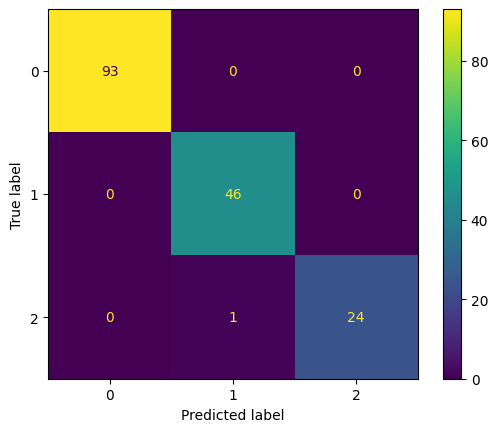

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

**KNN(K Nearest Neighbors) Classifier**

In [ ]:
#knn
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_kn=knn.predict(X_test)
y_pred_kn

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       0.98      1.00      0.99        46
           2       1.00      0.96      0.98        25

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



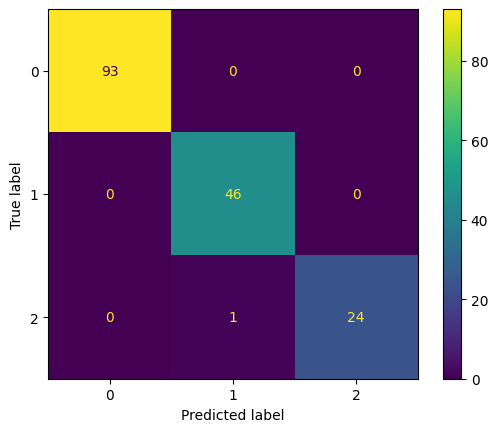

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_kn))

**Random Forest Classifier**

In [ ]:
#rf
rf=RandomForestClassifier(n_estimators=75,random_state=2)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       0.98      1.00      0.99        46
           2       1.00      0.96      0.98        25

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



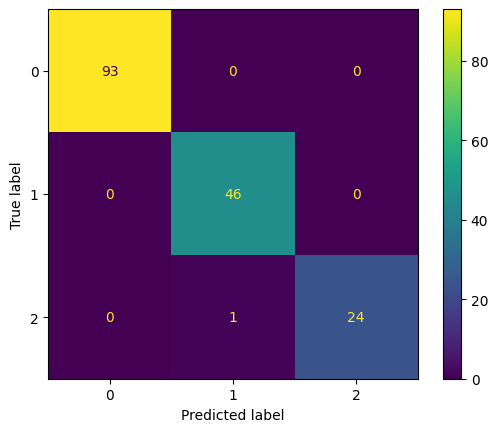

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

Random Forest model gives a high accuracy of 100%

**New Prediction**

In [ ]:
#new prediction

data={'Subscription Plan':['Premium'], 'Monthly Revenue ($)':[20], 'Age':[32],
       'Plan Duration (Months)':[11],
       'Total Movies/Shows Watched':[45], 'Genre Preference':['Comedy'],
       'No. of Recommendations Viewed':[4], '% of Recommendations Acted Upon':[20],
       'Frequency of Rating':['Monthly'], 'Duration':[500]}

df_pred=pd.DataFrame(data)

df_pred['Subscription Plan'] = sp.transform(df_pred['Subscription Plan'])
df_pred['Genre Preference'] = gn.transform(df_pred['Genre Preference'])
df_pred['Frequency of Rating'] = fr.transform(df_pred['Frequency of Rating'])

new_pred=rf.predict(sc.transform(df_pred))

if new_pred==0:
  print('Engagement level: Low')
elif new_pred==1:
  print('Engagement level: Medium')
else:
  print('Engagement level: High')


Engagement level: Low


**Streamlit app Creation**

Creating streamlit application for the model

In [ ]:
import pickle

In [ ]:
#saving the trained model
filename='trained_model.sav'
pickle.dump(sv,open('trained_model.sav','wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
#saving objects
obj=[sp,gn,fr,sc]
filename='object.sav'
pickle.dump(obj,open('object.sav','wb'))

In [ ]:
#loading
loaded_file=pickle.load(open('object.sav','rb'))
loaded_file

[LabelEncoder(), LabelEncoder(), LabelEncoder(), MinMaxScaler()]